In [3]:
from libraries import *

Size: 1548
           Date          UK
648  2024-01-31  278.318442
649  2024-02-29  279.679320
650  2024-03-31  281.119786
651  2024-04-30  281.463725
652  2024-05-31  283.513798
...         ...         ...
1543 2098-08-31  292.090237
1544 2098-09-30  290.784606
1545 2098-10-31  288.767088
1546 2098-11-30  281.167716
1547 2098-12-31  281.603563

[900 rows x 2 columns]
          Date          UK  UK_Celsius
648 2024-01-31  278.318442    5.168442
649 2024-02-29  279.679320    6.529320
650 2024-03-31  281.119786    7.969786
651 2024-04-30  281.463725    8.313725
652 2024-05-31  283.513798   10.363798


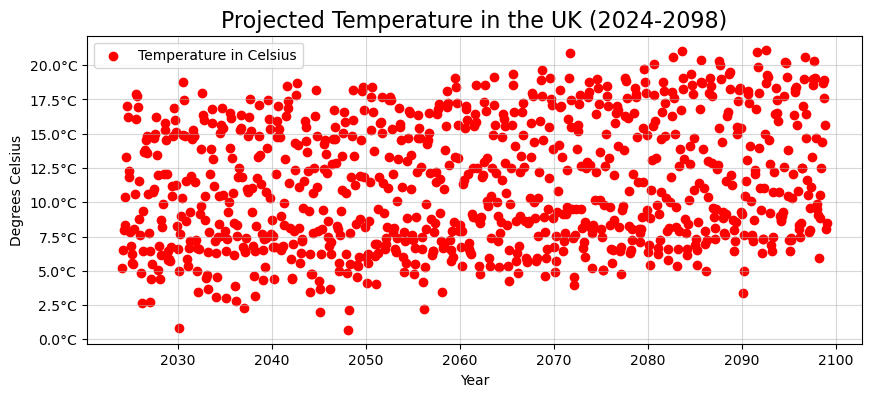

In [4]:
#### Temperature data for the UK ####

### Set the display options for the DataFrame
# @temp_path: file path
# @skiprows: skip the first 52 rows, they are metadata
# @sep: delimiter (comma in this case)
# @engine: Use Python engine for flexible parsing
# @on_bad_lines: Skip any problematic rows

# Load the data from the CSV file
temp_path = "data_files/P_CMI5_RCMO_CM20_TA-_0002m_Euro_NUT0_S197001010000_E209812312100_INS_TIM_01m_NA-_cdf_org_01_RCP85_NA---_NA---.csv"

temp_df = pd.read_csv(
    temp_path, 
    skiprows=52,  
    sep=',',      
    engine='python',  
    on_bad_lines='skip'
)

#----------------------------------------------------------------------------------------------------#
#### Data Cleaning ####
#----------------------------------------------------------------------------------------------------#

# Display the total numebr of rows to verify
rows_size = len(temp_df)
print(f"Size: {rows_size}")

# Uncomment the following to inspect the data
# temp_df.info()

# Display the first few rows to verify
# It confirms that the first 52 rows are metadata
# print(temp_df.head())

# Ensure 'Date' is parsed as a datetime column
temp_df['Date'] = pd.to_datetime(temp_df['Date'])

# No need to display the past data
# Filter rows between 2024 and 2098
temp_pred = temp_df[temp_df['Date'].dt.year >= 2024]

# Select only 'Date' and 'UK' columns
temp_uk = temp_pred[['Date', 'UK']]

# Display the resulting data
print(temp_uk)

# Return a view inted of copy. Require for python 3.0
# https://pandas.pydata.org/docs/user_guide/copy_on_write.html
pd.options.mode.copy_on_write = True

# Convert temperature from Kelvin to Celsius
# Function based on the formula from https://www.rapidtables.com/convert/temperature/how-kelvin-to-celsius.html
temp_uk['UK_Celsius'] = temp_uk['UK'] - 273.15

# Display the updated DataFrame in celcius
print(temp_uk.head())

# Function to add degree symbol to y-axis ticks
 # Format with 1 decimal place and °C
def kelvin_to_celsius(y, _):
    return f"{y:.1f}°C" 

#----------------------------------------------------------------------------------------------------#
#### Plot the data ####
#----------------------------------------------------------------------------------------------------#

plt.figure(figsize=(10, 4))
plt.scatter(temp_uk['Date'], temp_uk['UK_Celsius'], label='Temperature in Celsius', color='red')
plt.title('Projected Temperature in the UK (2024-2098)', fontsize=16)
plt.xlabel('Year')

# Add a formatter for the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(kelvin_to_celsius))
plt.ylabel('Degrees Celsius')
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# Data of a continuous variable that is densely sampled in time can potentially translate into smoothly interpolating auditory streams.
# In this case the temperature is sampled monthly, so we can use a continuous sound to represent the data.
# how the sets of data features and synthesis parameters should be linked in order to achieve a perceptually valid result.

# Define the signal generation function
def signal_generator(params, t):
    frequency, amplitude = params
    return amplitude * np.sin(2 * np.pi * frequency * t)

# Define the parameter mapping function
def parameter_mapping(temp):
    # Map temperature to frequency (Hz) and amplitude
    frequency = np.interp(temp, (temp_uk['UK_Celsius'].min(), temp_uk['UK_Celsius'].max()), (200, 800))
    amplitude = np.interp(temp, (temp_uk['UK_Celsius'].min(), temp_uk['UK_Celsius'].max()), (0.1, 1.0))
    return frequency, amplitude

# Generate the sonification
sampling_rate = 44100  # 44.1 kHz
duration = 1  # 1 second per data point
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

sonification = np.zeros(int(sampling_rate * duration * len(temp_uk)))

for i, temp in enumerate(temp_uk['UK_Celsius']):
    params = parameter_mapping(temp)
    sonification[i * int(sampling_rate * duration):(i + 1) * int(sampling_rate * duration)] = signal_generator(params, t)

# Normalize the sonification to the range [-1, 1]
sonification = sonification / np.max(np.abs(sonification))

# Save the sonification to a WAV file
write('temperature_sonification.wav', sampling_rate, sonification.astype(np.float32))

In [5]:
# File path
# precipitation in meters
# https://confluence.ecmwf.int/display/CKB/Climate+and+energy+indicators+for+Europe+Variable+Fact+Sheet%3A+Precipitation
precip_path = "data_files/P_CMI5_RCMO_CM20_TP-_0000m_Euro_NUT0_S197001010000_E209812312100_ACC_TIM_01m_NA-_cdf_org_01_RCP85_NA---_NA---.csv"

# Skip metadata rows and read the data
precip_df = pd.read_csv(
    precip_path, 
    skiprows=52,  # Skip rows up to the actual data header
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

# Display the first few rows to verify
# print(precip_df.head())

# Ensure 'Date' is parsed as a datetime column
precip_df['Date'] = pd.to_datetime(precip_df['Date'])

# Filter rows between 2024 and 2098
precip_pred = precip_df[precip_df['Date'].dt.year >= 2024]

# Select only 'Date' and 'UK' columns
precip_uk = precip_pred[['Date', 'UK']]

# Display the resulting data
print(precip_uk)



           Date        UK
648  2024-01-31  0.112557
649  2024-02-29  0.111266
650  2024-03-31  0.084483
651  2024-04-30  0.071342
652  2024-05-31  0.073365
...         ...       ...
1543 2098-08-31  0.062422
1544 2098-09-30  0.080680
1545 2098-10-31  0.085424
1546 2098-11-30  0.048578
1547 2098-12-31  0.097036

[900 rows x 2 columns]


In [52]:
# File path
# wind speed Metres per second (m/s or m s-1) 10 meters
# https://confluence.ecmwf.int/display/CKB/Climate+and+energy+indicators+for+Europe+Variable+Fact+Sheet%3A+Wind+Speed
wind_path = "data_files/P_CMI5_RCMO_CM20_WS-_0010m_Euro_NUT0_S197001010000_E209812312100_INS_TIM_01m_NA-_cdf_org_01_RCP85_NA---_NA---.csv"

# Skip metadata rows and read the data
wind_df = pd.read_csv(
    wind_path, 
    skiprows=52,  # Skip rows up to the actual data header
    sep=',',      # Specify the correct delimiter (comma in this case)
    engine='python',  # Use Python engine for flexible parsing
    on_bad_lines='skip'  # Skip any problematic rows
)

# Display the first few rows to verify
# print(wind_df.head())

# Ensure 'Date' is parsed as a datetime column
wind_df['Date'] = pd.to_datetime(wind_df['Date'])

# Filter rows between 2024 and 2098
wind_pred = wind_df[wind_df['Date'].dt.year >= 2024]

# Select only 'Date' and 'UK' columns
wind_uk = wind_pred[['Date', 'UK']]

# Display the resulting data
print(wind_uk)


           Date        UK
648  2024-01-31  5.663002
649  2024-02-29  6.870473
650  2024-03-31  5.629517
651  2024-04-30  3.811083
652  2024-05-31  4.063906
...         ...       ...
1543 2098-08-31  3.462024
1544 2098-09-30  4.471978
1545 2098-10-31  4.152824
1546 2098-11-30  3.629667
1547 2098-12-31  4.886961

[900 rows x 2 columns]
